## Title : Bank Term Deposit Subscription
    
Aim : Develop a predictive model to classify whether customers will subscribe to Bank Term Deposit or not

Term Deposit : 
       1. A term deposit is a type of deposit account held at a financial institution where money is locked up for some set period of time.                                                        
        2. In short, a Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate in which your money will be returned back at a specific maturity time

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Bank_Details.csv")

In [3]:
pd.options.display.max_columns = None
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

1. Data has 17 features with 11162 customers
2. Data does not have any null values
3. Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)
4. Average balance is 1528.3 (Minimum: -6847 old and Maximum: 81204). Very high std deviation for Balance hence data is heavily distributed throughout dataset 

Text(0.5, 1.0, 'Distribution of Term Deposit count ')

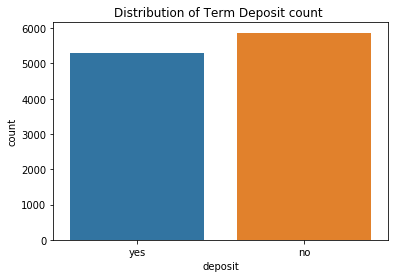

In [7]:
sns.countplot(x = 'deposit',data = data)
plt.title("Distribution of Term Deposit count ")    

In [8]:
def bar_plot_basic(var,data):
    sns.countplot(x = var,data = data)
    plt.xlabel(var)
    plt.title("Distribution of {}".format(var))    

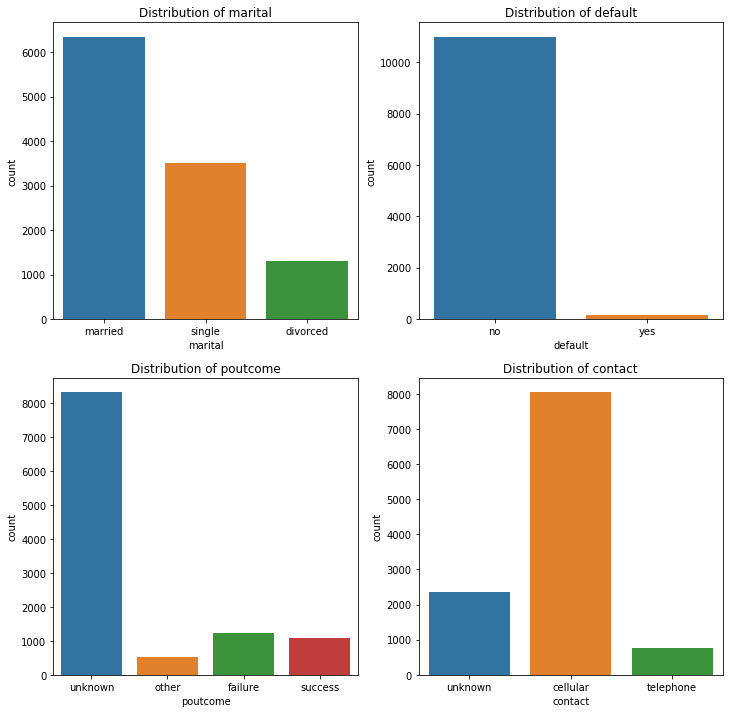

In [9]:
plt.figure(figsize = [12,12])
plt.subplot(221)
bar_plot_basic('marital',data)

plt.subplot(222)
bar_plot_basic('default',data)

plt.subplot(223)
bar_plot_basic('poutcome',data)

plt.subplot(224)
bar_plot_basic('contact',data)

Text(0.5, 1.0, 'Distribution of Month')

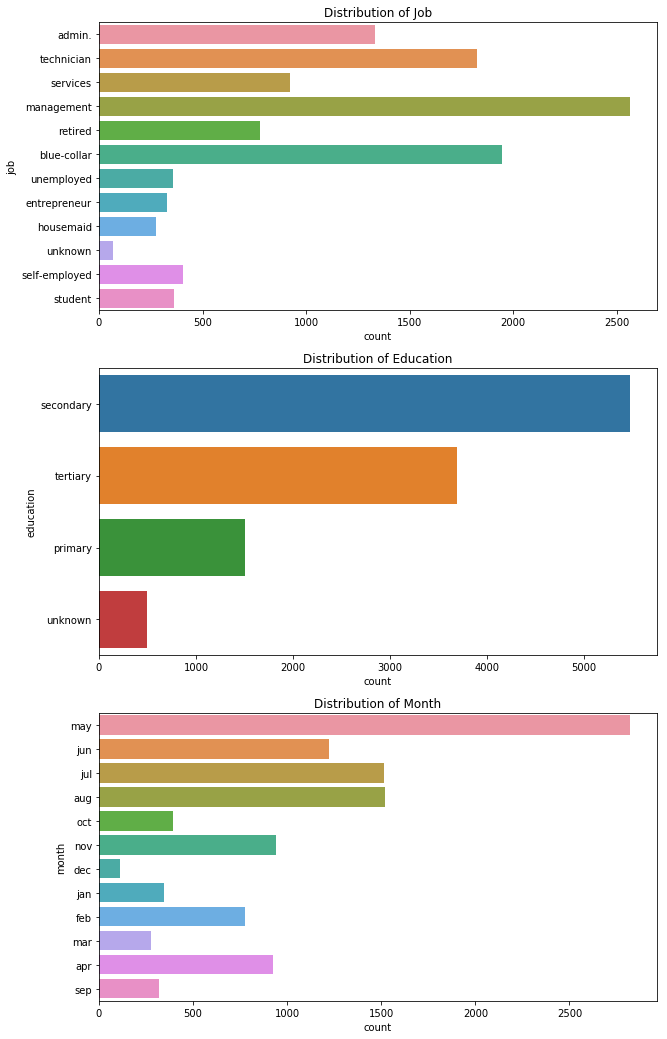

In [10]:
plt.figure(figsize = [10,18])

plt.subplot(311)
sns.countplot(y = 'job',data = data)
plt.title("Distribution of Job")

plt.subplot(312)
sns.countplot(y = 'education',data = data)
plt.title("Distribution of Education")

plt.subplot(313)
sns.countplot(y = 'month',data = data)
plt.title("Distribution of Month")

Observations : 
    1. There are around 5300 custmers with 'yes' while 5800 ustmers with 'No' for Term Deposit subscription.
    2. More than 50% of the customers are married
    3. Maximum number of people have cellular contact rather than telephone
    4. Most of the customers are management,Blue-collar and technicians

In [11]:
def bar_plot(var1,var2,data):
    sns.countplot(x=var1,hue=var2,data = data)
    plt.xlabel(var1)
    plt.title("Distribution of {} by {}".format(var1,var2))  

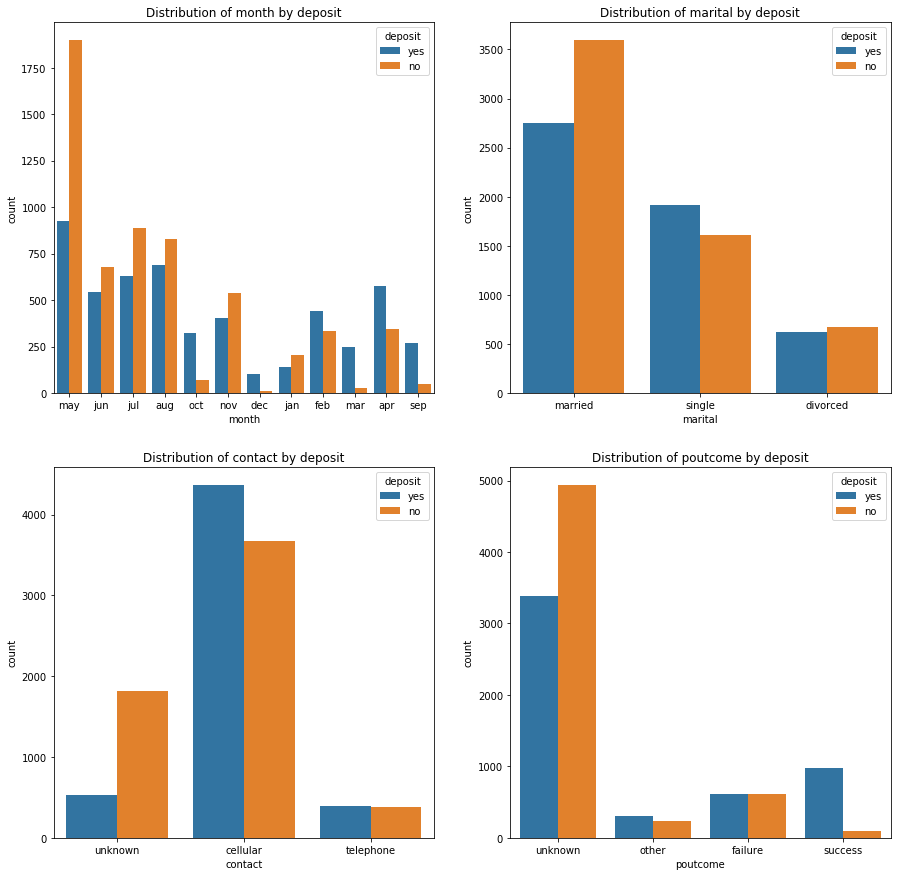

In [12]:
plt.figure(figsize = [15,15])

plt.subplot(221)
bar_plot('month','deposit',data)

plt.subplot(222)
bar_plot('marital','deposit',data)

plt.subplot(223)
bar_plot('contact','deposit',data)

plt.subplot(224)
bar_plot('poutcome','deposit',data)

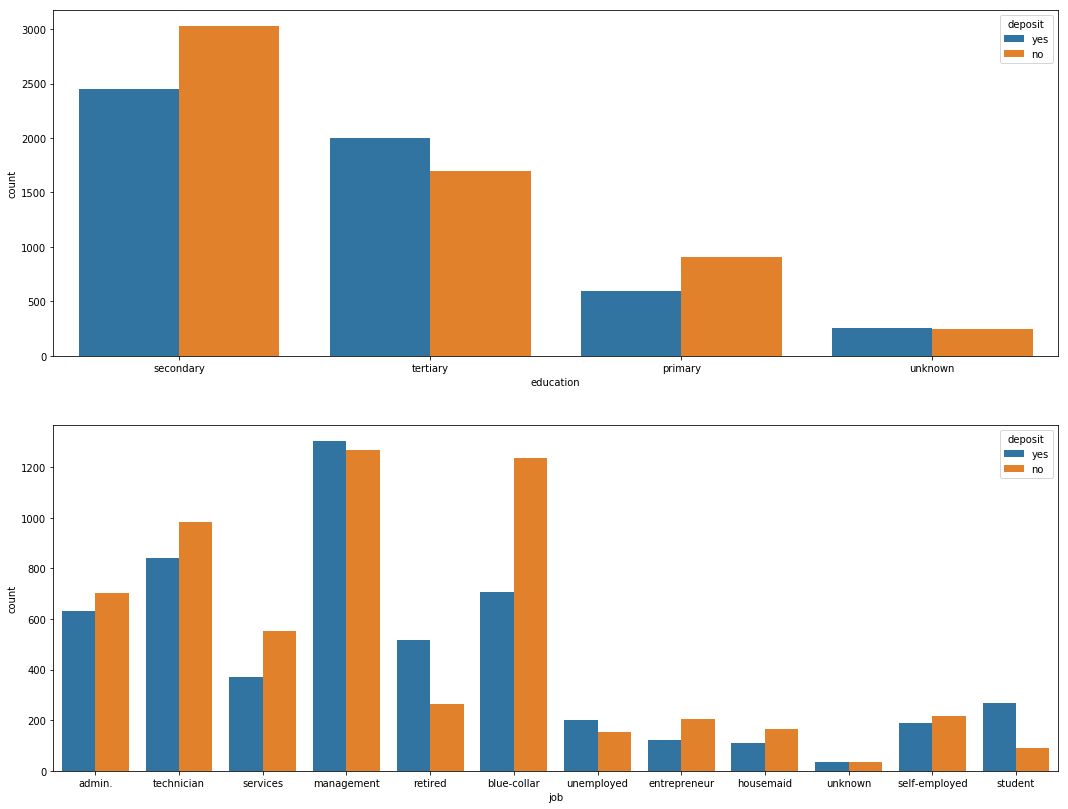

In [13]:
plt.figure(figsize = [18,14])

plt.subplot(211)
sns.countplot(x = 'education',hue = 'deposit',data = data)

plt.subplot(212)
sns.countplot(x = 'job',hue = 'deposit',data= data)

Converting Categorical Variables to Numerical formats

Observations : 
    1. Maximum and minimum number of customers with term deposit are in May month (It is obvious because almost 25% of customers are from may month)
    2. There are around 2700 customers who are married and also have term deposit subscribed
    3. Customers with cellular contact have higher chances of term deposit subscription
    4. Customers who are management, technician and blue-collar have high chances of term deposit subscription

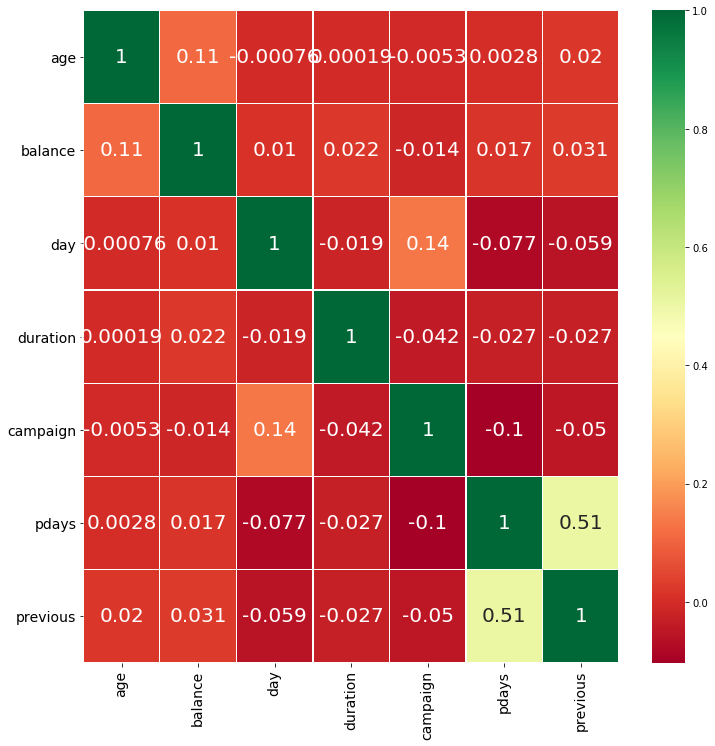

In [14]:
# Correlation before converting Categorical variables
corr = data.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.job = le.fit_transform(data.job)
data.education = le.fit_transform(data.education)
data.marital = le.fit_transform(data.marital)
data.default = le.fit_transform(data.default)
data.housing = le.fit_transform(data.housing)
data.loan = le.fit_transform(data.loan)
data.contact = le.fit_transform(data.contact)
data.month = le.fit_transform(data.month)
data.poutcome = le.fit_transform(data.poutcome)
data.deposit = le.fit_transform(data.deposit)
data.loan = le.fit_transform(data.loan)
data.contact = le.fit_transform(data.contact)
data.month = le.fit_transform(data.month)

In [16]:
data["pdays"].replace(-1,int(0),inplace=True)

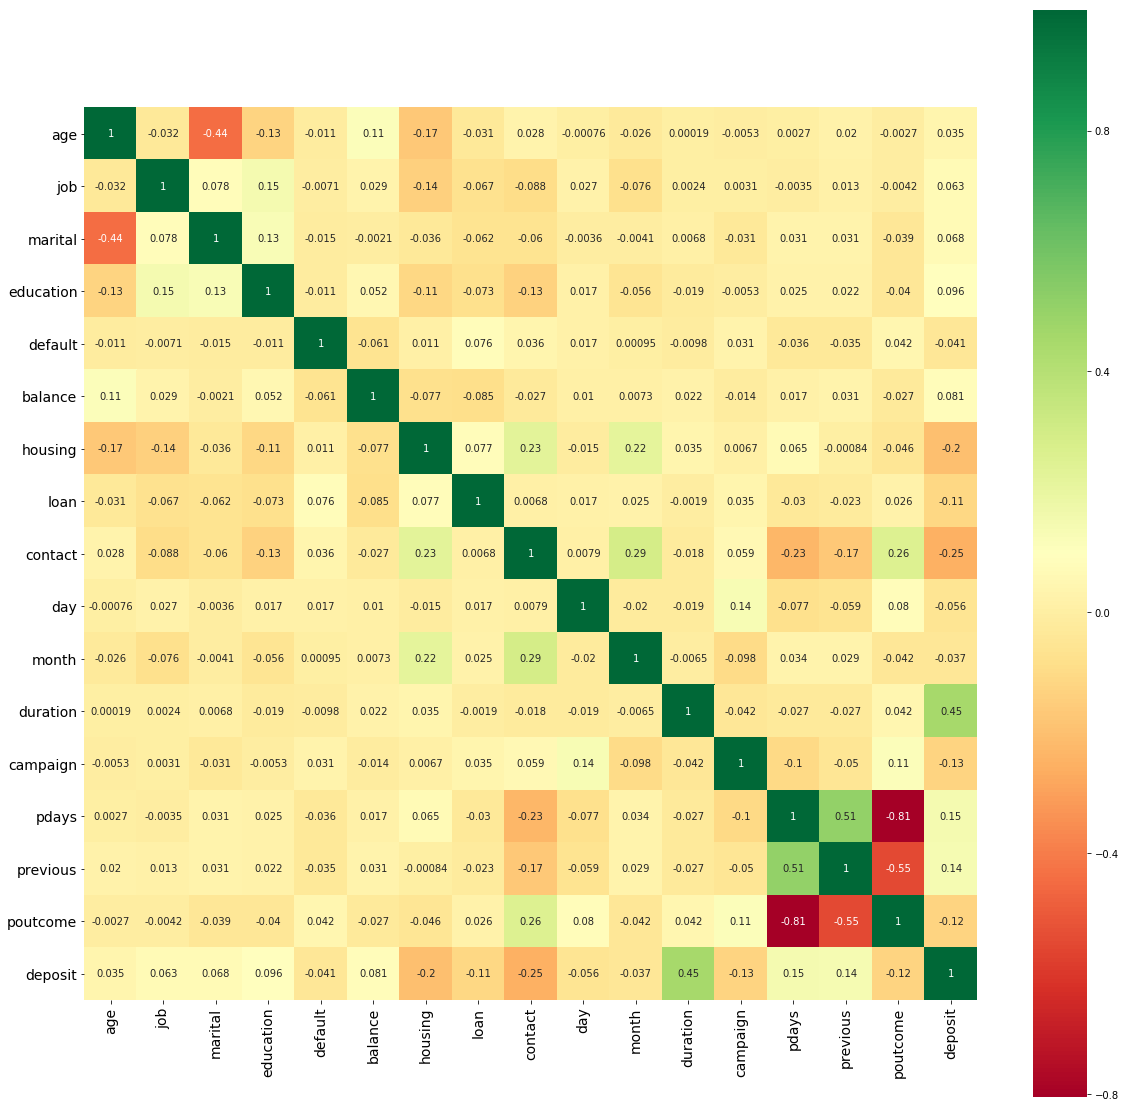

In [17]:
corr = data.corr()

sns.heatmap(corr,annot=True,square = True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [18]:
#Separating X & Y
x=data.drop(columns = ["deposit"])
y=data["deposit"]

Scaling the data for good results

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score
from sklearn.model_selection import cross_val_score

### Logistic Regression

In [22]:
LR = LogisticRegression()
lr = LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
LR_Score = accuracy_score(y_pred,y_test)
print("Accuracy Using LR : ", accuracy_score(y_pred,y_test)*100)
print("Recall score : " ,recall_score(y_pred,y_test) * 100)
print("ROC score : ", roc_auc_score(y_pred,y_test) * 100)

Accuracy Using LR :  79.11142959512719
Recall score :  77.56059421422987
ROC score :  78.99193731875515


C:\Users\kulka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
lr_acc = cross_val_score(lr, X_train, y_train, cv=3, scoring='accuracy')
print(lr_acc)
CV_LR_score = lr_acc.mean()
print("CV Score using LR : ",CV_LR_score)

[0.80007166 0.80437119 0.79526712]
CV Score using LR :  0.7999033242854011


C:\Users\kulka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kulka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kulka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Support Vector Machines

In [24]:
SVM = SVC(kernel='rbf',C =1) 

svm = SVM.fit(X_train,y_train)
y_pred_svm = SVM.predict(X_test)
SVM_Score = accuracy_score(y_pred_svm,y_test)

print("Accuracy Using SVM : ", accuracy_score(y_pred_svm,y_test)*100)
print("Recall score : " ,recall_score(y_pred_svm,y_test) * 100)
print("ROC score : ", roc_auc_score(y_pred_svm,y_test) * 100)

C:\Users\kulka\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Using SVM :  81.65532067359369
Recall score :  78.69822485207101
ROC score :  81.5659296602259


### K Nearest Neighbours

In [25]:
KNN = KNeighborsClassifier()

KNN.fit(X_train,y_train)
y_pred_knn = KNN.predict(X_test)
KNN_Score = accuracy_score(y_pred_knn,y_test)

print("Accuracy Using KNN : ", accuracy_score(y_pred_knn,y_test)*100)
print("Recall score : " ,recall_score(y_pred_knn,y_test) * 100)
print("ROC score : ", roc_auc_score(y_pred_knn,y_test) * 100)


Accuracy Using KNN :  78.21569329989251
Recall score :  78.1456953642384
ROC score :  78.20740232520195


### Random Forest

In [26]:
RF= RandomForestClassifier(random_state=0)
from sklearn.model_selection import GridSearchCV
pg_rf={'n_estimators': [100,200,400,500],'max_depth': [20,40,50,60]}
gs_rf=GridSearchCV(estimator= RF,
               param_grid= pg_rf,
               scoring='accuracy',
               cv=2)

In [27]:
gs_rf_scores = cross_val_score(gs_rf, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)
gs_rf.fit(X_train, y_train)
gs_rf_best=gs_rf.best_estimator_
gs_rf_best.fit(X_train, y_train)
y_pred_RF = gs_rf_best.predict(X_test)

In [28]:
RF_Score = gs_rf_scores.mean()
print("Cross Validation Avg Accuracy Using RF : ", gs_rf_scores.mean()*100)
print("Accuracy Using best RF : ", gs_rf_scores.mean()*100)
print("Recall score : " ,recall_score(y_pred_RF,y_test) * 100)
print("ROC score : ", roc_auc_score(y_pred_RF,y_test) * 100)

Cross Validation Avg Accuracy Using RF :  84.45828919916548
Accuracy Using best RF :  84.45828919916548
Recall score :  80.6991988346686
ROC score :  84.00263185739072


In [29]:
importances = gs_rf_best.feature_importances_
importances

array([0.07955475, 0.03902812, 0.01859054, 0.02261686, 0.00139652,
       0.08768574, 0.03344987, 0.01110585, 0.04417702, 0.07017863,
       0.08237762, 0.37042599, 0.0344406 , 0.04736495, 0.02531416,
       0.03229277])

In [30]:
feature_names = x.columns

In [31]:
 for name, importance in zip(feature_names, gs_rf_best.feature_importances_):
        print(name, "=", importance)

age = 0.079554750396534
job = 0.03902812282553837
marital = 0.018590542693333056
education = 0.022616861808510243
default = 0.0013965198032888078
balance = 0.08768574469645705
housing = 0.03344987410433572
loan = 0.011105847685594642
contact = 0.044177015245494375
day = 0.07017862946425676
month = 0.08237762084447844
duration = 0.3704259907694196
campaign = 0.03444060003445827
pdays = 0.04736495225036003
previous = 0.025314161428168138
poutcome = 0.032292765949772546


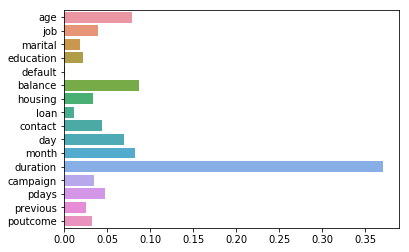

In [32]:
# Important Features using Random Forest
sns.barplot(gs_rf_best.feature_importances_,feature_names)
#feat_importances = pd.Series(gs_rf_best.feature_importances_, index=feature_names)

### XGBoost

In [33]:
import xgboost
xgb = xgboost.XGBClassifier(n_estimators=200, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)
y_pred_XGB = xgb.predict(X_test)
XGB_Score = accuracy_score(y_pred_XGB,y_test)

print("Accuracy Using SVM : ", accuracy_score(y_pred_XGB,y_test)*100)
print("Recall score : " ,recall_score(y_pred_XGB,y_test) * 100)
print("ROC score : ", roc_auc_score(y_pred_XGB,y_test) * 100)

Accuracy Using SVM :  85.66821927624507
Recall score :  82.6470588235294
ROC score :  85.59327085131746


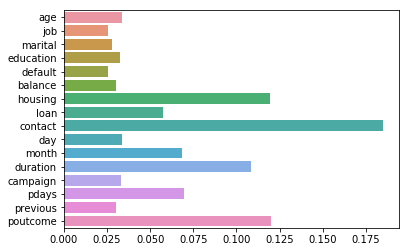

In [34]:
sns.barplot(xgb.feature_importances_,feature_names)

### All Results

In [36]:
Results = pd.DataFrame({'Model': ['Logistic Regression','SVM','KNN','Random Forest','XGBoost'],
                        'Accuracy Score' : [CV_LR_score,SVM_Score,KNN_Score,RF_Score,XGB_Score]})

In [37]:
Final_Results = Results.sort_values(by = 'Accuracy Score', ascending=False)
Final_Results = Final_Results.set_index('Model')
print(Final_Results)

                     Accuracy Score
Model                              
XGBoost                    0.856682
Random Forest              0.844583
SVM                        0.816553
Logistic Regression        0.799903
KNN                        0.782157


From above, we conclude that
1. XGBoost and Random Forest models have given better accuracy
2. Duration, Housing, Contact, poutcome, balance are the most important features of customers to be considered while subscribing to Term deposit.